In [1]:
import sys
import numpy as np
import pandas as pd

from pathlib import Path
current_path = Path().resolve()
sys.path.append(str(current_path / '../code/'))
from table import Table

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# Load data

In [2]:
# Data folders
mkp_data_folder = '../Data/Produced/Multiple Knapsack/'
qap_data_folder = '../Data/Produced/Quadratic Assignment Problem/'
tsps_data_folder = '../Data/Produced/Travelling Salesman Problem/Small/'
tspl_data_folder = '../Data/Produced/Travelling Salesman Problem/Large/'

# Import MKP results
# Verma and Lewis
mkp_vl_greedy = pd.read_pickle(mkp_data_folder + 'vlewis_mk_greedy_broken_constraints.pkl')
mkp_vl_sa = pd.read_pickle(mkp_data_folder + 'vlewis_mk_sa_broken_constraints.pkl')
mkp_vl_tabu = pd.read_pickle(mkp_data_folder + 'vlewis_mk_tabu_broken_constraints.pkl')
# Expected Constraint
mkp_ec_greedy = pd.read_pickle(mkp_data_folder + 'expected_mk_greedy_broken_constraints.pkl')
mkp_ec_sa = pd.read_pickle(mkp_data_folder + 'expected_mk_sa_broken_constraints.pkl')
mkp_ec_tabu = pd.read_pickle(mkp_data_folder + 'expected_mk_tabu_broken_constraints.pkl')
# Minimum Lazy
mkp_ml_greedy = pd.read_pickle(mkp_data_folder + 'lazy_mk_greedy_broken_constraints.pkl')
mkp_ml_sa = pd.read_pickle(mkp_data_folder + 'lazy_mk_sa_broken_constraints.pkl')
mkp_ml_tabu = pd.read_pickle(mkp_data_folder + 'lazy_mk_tabu_broken_constraints.pkl')
# Verma and Lewis Reality Check
mkp_vlrc_greedy = pd.read_pickle(mkp_data_folder + 'vlewischeck_mk_greedy_broken_constraints.pkl')
mkp_vlrc_sa = pd.read_pickle(mkp_data_folder + 'vlewischeck_mk_sa_broken_constraints.pkl')
mkp_vlrc_tabu = pd.read_pickle(mkp_data_folder + 'vlewischeck_mk_tabu_broken_constraints.pkl')


# Import QAP results
# Verma and Lewis
qap_vl_greedy = pd.read_pickle(qap_data_folder + 'vlewis_qap_greedy_broken_constraints.pkl')
qap_vl_sa = pd.read_pickle(qap_data_folder + 'vlewis_qap_sa_broken_constraints.pkl')
qap_vl_tabu = pd.read_pickle(qap_data_folder + 'vlewis_qap_tabu_broken_constraints.pkl')
# Expected Constraint
qap_ec_greedy = pd.read_pickle(qap_data_folder + 'expected_qap_greedy_broken_constraints.pkl')
qap_ec_sa = pd.read_pickle(qap_data_folder + 'expected_qap_sa_broken_constraints.pkl')
qap_ec_tabu = pd.read_pickle(qap_data_folder + 'expected_qap_tabu_broken_constraints.pkl')
# Minimum Lazy
qap_ml_greedy = pd.read_pickle(qap_data_folder + 'lazy_qap_greedy_broken_constraints.pkl')
qap_ml_sa = pd.read_pickle(qap_data_folder + 'lazy_qap_sa_broken_constraints.pkl')
qap_ml_tabu = pd.read_pickle(qap_data_folder + 'lazy_qap_tabu_broken_constraints.pkl')
# Verma and Lewis Reality Check
qap_vlrc_greedy = pd.read_pickle(qap_data_folder + 'vlewischeck_qap_greedy_broken_constraints.pkl')
qap_vlrc_sa = pd.read_pickle(qap_data_folder + 'vlewischeck_qap_sa_broken_constraints.pkl')
qap_vlrc_tabu = pd.read_pickle(qap_data_folder + 'vlewischeck_qap_tabu_broken_constraints.pkl')

# Import TSP Small resuts
# Verma and Lewis
tsps_vl_greedy = pd.read_pickle(tsps_data_folder + 'vlewis_tsp_greedy_broken_constraints.pkl')
tsps_vl_sa = pd.read_pickle(tsps_data_folder + 'vlewis_tsp_sa_broken_constraints.pkl')
tsps_vl_tabu = pd.read_pickle(tsps_data_folder + 'vlewis_tsp_tabu_broken_constraints.pkl')
# Expected Constraint
tsps_ec_greedy = pd.read_pickle(tsps_data_folder + 'expected_tsp_greedy_broken_constraints.pkl')
tsps_ec_sa = pd.read_pickle(tsps_data_folder + 'expected_tsp_sa_broken_constraints.pkl')
tsps_ec_tabu = pd.read_pickle(tsps_data_folder + 'expected_tsp_tabu_broken_constraints.pkl')
# Minimum Lazy
tsps_ml_greedy = pd.read_pickle(tsps_data_folder + 'lazy_tsp_greedy_broken_constraints.pkl')
tsps_ml_sa = pd.read_pickle(tsps_data_folder + 'lazy_tsp_sa_broken_constraints.pkl')
tsps_ml_tabu = pd.read_pickle(tsps_data_folder + 'lazy_tsp_tabu_broken_constraints.pkl')
# Verma and Lewis Reality Check
tsps_vlrc_greedy = pd.read_pickle(tsps_data_folder + 'vlewischeck_tsp_greedy_broken_constraints.pkl')
tsps_vlrc_sa = pd.read_pickle(tsps_data_folder + 'vlewischeck_tsp_sa_broken_constraints.pkl')
tsps_vlrc_tabu = pd.read_pickle(tsps_data_folder + 'vlewischeck_tsp_tabu_broken_constraints.pkl')

# Import TSP Large results
# Verma and Lewis
tspl_vl_greedy = pd.read_pickle(tspl_data_folder + 'vlewis_tspL_greedy_broken_constraints.pkl')
tspl_vl_sa = pd.read_pickle(tspl_data_folder + 'vlewis_tspL_sa_broken_constraints.pkl')
tspl_vl_tabu = pd.read_pickle(tspl_data_folder + 'vlewis_tspL_tabu_broken_constraints.pkl')
# Expected Constraint
tspl_ec_greedy = pd.read_pickle(tspl_data_folder + 'expected_tspL_greedy_broken_constraints.pkl')
tspl_ec_sa = pd.read_pickle(tspl_data_folder + 'expected_tspL_sa_broken_constraints.pkl')
tspl_ec_tabu = pd.read_pickle(tspl_data_folder + 'expected_tspL_tabu_broken_constraints.pkl')
# Minimum Lazy
tspl_ml_greedy = pd.read_pickle(tspl_data_folder + 'lazy_tspL_greedy_broken_constraints.pkl')
tspl_ml_sa = pd.read_pickle(tspl_data_folder + 'lazy_tspL_sa_broken_constraints.pkl')
tspl_ml_tabu = pd.read_pickle(tspl_data_folder + 'lazy_tspL_tabu_broken_constraints.pkl')
# Verma and Lewis Reality Check
tspl_vlrc_greedy = pd.read_pickle(tspl_data_folder + 'vlewischeck_tspL_greedy_broken_constraints.pkl')
tspl_vlrc_sa = pd.read_pickle(tspl_data_folder + 'vlewischeck_tspL_sa_broken_constraints.pkl')
tspl_vlrc_tabu = pd.read_pickle(tspl_data_folder + 'vlewischeck_tspL_tabu_broken_constraints.pkl')

As we will be comparing results produced using Verma and Lewis method to three other methods, we are prone to family-wise error. To eliminate it, we have produced three times more data with VL method. Here we will shuffle all the results and split them into 3 equal dataframes, each of which will be used indedpendantly only for a single comparison.

In [3]:
# MKP
mkp_vl_greedy = mkp_vl_greedy.sample(frac=1, axis=1)
mkp_vl_greedy = np.array_split(mkp_vl_greedy, 3, axis=1)
mkp_vl_greedy_1, mkp_vl_greedy_2, mkp_vl_greedy_3 = mkp_vl_greedy[0], mkp_vl_greedy[1], mkp_vl_greedy[2]

mkp_vl_sa = mkp_vl_sa.sample(frac=1, axis=1)
mkp_vl_sa = np.array_split(mkp_vl_sa, 3, axis=1)
mkp_vl_sa_1, mkp_vl_sa_2, mkp_vl_sa_3 = mkp_vl_sa[0], mkp_vl_sa[1], mkp_vl_sa[2]

mkp_vl_tabu = mkp_vl_tabu.sample(frac=1, axis=1)
mkp_vl_tabu = np.array_split(mkp_vl_tabu, 3, axis=1)
mkp_vl_tabu_1, mkp_vl_tabu_2, mkp_vl_tabu_3 = mkp_vl_tabu[0], mkp_vl_tabu[1], mkp_vl_tabu[2]


# QAP
qap_vl_greedy = qap_vl_greedy.sample(frac=1, axis=1)
qap_vl_greedy = np.array_split(qap_vl_greedy, 3, axis=1)
qap_vl_greedy_1, qap_vl_greedy_2, qap_vl_greedy_3 = qap_vl_greedy[0], qap_vl_greedy[1], qap_vl_greedy[2]

qap_vl_sa = qap_vl_sa.sample(frac=1, axis=1)
qap_vl_sa = np.array_split(qap_vl_sa, 3, axis=1)
qap_vl_sa_1, qap_vl_sa_2, qap_vl_sa_3 = qap_vl_sa[0], qap_vl_sa[1], qap_vl_sa[2]

qap_vl_tabu = qap_vl_tabu.sample(frac=1, axis=1)
qap_vl_tabu = np.array_split(qap_vl_tabu, 3, axis=1)
qap_vl_tabu_1, qap_vl_tabu_2, qap_vl_tabu_3 = qap_vl_tabu[0], qap_vl_tabu[1], qap_vl_tabu[2]

# TSP Small
tsps_vl_greedy = tsps_vl_greedy.sample(frac=1, axis=1)
tsps_vl_greedy = np.array_split(tsps_vl_greedy, 3, axis=1)
tsps_vl_greedy_1, tsps_vl_greedy_2, tsps_vl_greedy_3 = tsps_vl_greedy[0], tsps_vl_greedy[1], tsps_vl_greedy[2]

tsps_vl_sa = tsps_vl_sa.sample(frac=1, axis=1)
tsps_vl_sa = np.array_split(tsps_vl_sa, 3, axis=1)
tsps_vl_sa_1, tsps_vl_sa_2, tsps_vl_sa_3 = tsps_vl_sa[0], tsps_vl_sa[1], tsps_vl_sa[2]

tsps_vl_tabu = tsps_vl_tabu.sample(frac=1, axis=1)
tsps_vl_tabu = np.array_split(tsps_vl_tabu, 3, axis=1)
tsps_vl_tabu_1, tsps_vl_tabu_2, tsps_vl_tabu_3 = tsps_vl_tabu[0], tsps_vl_tabu[1], tsps_vl_tabu[2]

# TSP Large
tspl_vl_greedy = tspl_vl_greedy.sample(frac=1, axis=1)
tspl_vl_greedy = np.array_split(tspl_vl_greedy, 3, axis=1)
tspl_vl_greedy_1, tspl_vl_greedy_2, tspl_vl_greedy_3 = tspl_vl_greedy[0], tspl_vl_greedy[1], tspl_vl_greedy[2]

tspl_vl_sa = tspl_vl_sa.sample(frac=1, axis=1)
tspl_vl_sa = np.array_split(tspl_vl_sa, 3, axis=1)
tspl_vl_sa_1, tspl_vl_sa_2, tspl_vl_sa_3 = tspl_vl_sa[0], tspl_vl_sa[1], tspl_vl_sa[2]

tspl_vl_tabu = tspl_vl_tabu.sample(frac=1, axis=1)
tspl_vl_tabu = np.array_split(tspl_vl_tabu, 3, axis=1)
tspl_vl_tabu_1, tspl_vl_tabu_2, tspl_vl_tabu_3 = tspl_vl_tabu[0], tspl_vl_tabu[1], tspl_vl_tabu[2]

# Compare statistical significance

## Multiple Knapsack Problem

### Compare Verma and Lewis to Expected Constraint

Negative t-statistic means that the means of Verma and Lewis results are smaller. Therefore, the number of broken constraints achieved with the V&L is significantly smaller.

In [4]:
Table.significance_test(mkp_vl_greedy_1, mkp_vl_sa_1, mkp_vl_tabu_1, mkp_ec_greedy, mkp_ec_sa, mkp_ec_tabu)

,Greedy Algorithm,Simulated Annealing,Tabu Search
t-statistic,-2.706085e+01,-2.894882e+01,-7.839577e+00
p-value,6.176995e-132,4.311554e-147,8.449691e-15


In [5]:
mk_expected_sig = Table.detailed_significance_test(mkp_vl_greedy_1, 
                                                   mkp_vl_sa_1, 
                                                   mkp_vl_tabu_1, 
                                                   mkp_ec_greedy, 
                                                   mkp_ec_sa, 
                                                   mkp_ec_tabu)
mk_expected_sig

,Greedy Algorithm t-statistic,Greedy Algorithm p-value,Simulated Annealing t-statistic,Simulated Annealing p-value,Tabu Search t-statistic,Tabu Search p-value
Problem,,,,,,
0,-5.817758,1.012446e-06,-8.456664,2.897396e-10,-5.377673,4.059575e-06
1,-11.433647,7.257981e-14,-7.807491,2.043053e-09,-3.191075,2.841796e-03
2,-11.372881,8.498862e-14,-8.882317,8.264231e-11,-3.076830,3.868503e-03
3,-11.163522,1.469261e-13,-7.199482,1.323164e-08,-4.004885,2.783259e-04
4,-11.667644,3.969835e-14,-9.577043,1.119030e-11,-2.900908,6.156498e-03
5,-7.404661,7.017574e-09,-8.367622,3.777044e-10,-3.920765,3.569684e-04
6,-9.158312,3.707417e-11,-10.828362,3.571092e-13,-3.137988,3.281780e-03
7,-13.283727,7.406989e-16,-10.740473,4.518453e-13,-3.572853,9.797495e-04
8,-11.727180,3.408646e-14,-11.594415,4.791290e-14,-3.610920,8.787488e-04


### Compare Verma and Lewis to Minimum Lazy

In [6]:
Table.significance_test(mkp_vl_greedy_2, mkp_vl_sa_2, mkp_vl_tabu_2, mkp_ml_greedy, mkp_ml_sa, mkp_ml_tabu)

,Greedy Algorithm,Simulated Annealing,Tabu Search
t-statistic,-2.849770e+01,-2.752640e+01,-1.278433e+01
p-value,1.927157e-143,1.213563e-135,1.282600e-35


In [7]:
mk_lazy_sig = Table.detailed_significance_test(mkp_vl_greedy_2, 
                                               mkp_vl_sa_2, 
                                               mkp_vl_tabu_2, 
                                               mkp_ml_greedy, 
                                               mkp_ml_sa, 
                                               mkp_ml_tabu)
mk_lazy_sig

,Greedy Algorithm t-statistic,Greedy Algorithm p-value,Simulated Annealing t-statistic,Simulated Annealing p-value,Tabu Search t-statistic,Tabu Search p-value
Problem,,,,,,
0,-8.868387,8.607575e-11,-5.712048,1.413839e-06,-4.623384,0.000043
1,-5.606409,1.973623e-06,-4.043695,2.479984e-04,-2.697495,0.010360
2,-11.371746,8.523986e-14,-8.862320,8.761622e-11,-3.082819,0.003807
3,-14.729460,2.725035e-17,-7.299380,9.712262e-09,-4.462377,0.000070
4,-11.636441,4.300709e-14,-9.954678,3.872969e-12,-2.906802,0.006063
5,-7.405344,7.002814e-09,-8.374650,3.698695e-10,-3.920763,0.000357
6,-9.155634,3.736189e-11,-10.836058,3.498434e-13,-3.138852,0.003274
7,-13.283826,7.405249e-16,-10.704144,4.981467e-13,-3.575068,0.000974
8,-11.767925,3.071819e-14,-11.826293,2.647427e-14,-3.613479,0.000872


### Compare Verma and Lewis to Verma and Lewis Reality Check

In [8]:
Table.significance_test(mkp_vl_greedy_3, mkp_vl_sa_3, mkp_vl_tabu_3, mkp_vlrc_greedy, mkp_vlrc_sa, mkp_vlrc_tabu)

,Greedy Algorithm,Simulated Annealing,Tabu Search
t-statistic,-1.352308,-0.291327,-1.081454
p-value,0.176478,0.770841,0.279667


In [9]:
mk_ckeck_sig = Table.detailed_significance_test(mkp_vl_greedy_3, 
                                                mkp_vl_sa_3, 
                                                mkp_vl_tabu_3, 
                                                mkp_vlrc_greedy, 
                                                mkp_vlrc_sa, 
                                                mkp_vlrc_tabu)
mk_ckeck_sig

,Greedy Algorithm t-statistic,Greedy Algorithm p-value,Simulated Annealing t-statistic,Simulated Annealing p-value,Tabu Search t-statistic,Tabu Search p-value
Problem,,,,,,
0,-0.589405,0.559078,-1.525615,0.135387,1.250882,0.218625
1,-1.405932,0.167869,0.400829,0.690791,-1.251803,0.218293
2,1.407195,0.167497,-0.710753,0.481577,-0.613045,0.543499
3,0.318225,0.752056,2.516666,0.016188,-1.317218,0.195654
4,0.730348,0.469657,-0.224309,0.823719,-0.899367,0.374121
5,-0.579899,0.565405,0.000000,1.000000,-1.582001,0.121938
6,0.000000,1.000000,-0.751832,0.456784,-1.873479,0.068708
7,-2.279125,0.028364,0.908237,0.369477,-1.266067,0.213196
8,0.432618,0.667738,0.776515,0.442252,-0.678908,0.501310


## Quadratic Assignment Problem

### Compare Verma and Lewis to Expected Constraint

In [10]:
Table.significance_test(qap_vl_greedy_1, qap_vl_sa_1, qap_vl_tabu_1, qap_ec_greedy, qap_ec_sa, qap_ec_tabu)

,Greedy Algorithm,Simulated Annealing,Tabu Search
t-statistic,NaN,NaN,NaN
p-value,NaN,NaN,NaN


In [11]:
qa_expected_sig = Table.detailed_significance_test(qap_vl_greedy_1, 
                                                   qap_vl_sa_1, 
                                                   qap_vl_tabu_1, 
                                                   qap_ec_greedy, 
                                                   qap_ec_sa, 
                                                   qap_ec_tabu)
qa_expected_sig

,Greedy Algorithm t-statistic,Greedy Algorithm p-value,Simulated Annealing t-statistic,Simulated Annealing p-value,Tabu Search t-statistic,Tabu Search p-value
Problem,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN


### Compare Verma and Lewis to Minimum Lazy

In [12]:
Table.significance_test(qap_vl_greedy_2, qap_vl_sa_2, qap_vl_tabu_2, qap_ml_greedy, qap_ml_sa, qap_ml_tabu)

,Greedy Algorithm,Simulated Annealing,Tabu Search
t-statistic,NaN,NaN,NaN
p-value,NaN,NaN,NaN


In [13]:
qa_lazy_sig = Table.detailed_significance_test(qap_vl_greedy_2, 
                                               qap_vl_sa_2, 
                                               qap_vl_tabu_2, 
                                               qap_ml_greedy, 
                                               qap_ml_sa, 
                                               qap_ml_tabu)
qa_lazy_sig

,Greedy Algorithm t-statistic,Greedy Algorithm p-value,Simulated Annealing t-statistic,Simulated Annealing p-value,Tabu Search t-statistic,Tabu Search p-value
Problem,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN


### Compare Verma and Lewis to Verma and Lewis Reality Check

In [14]:
Table.significance_test(qap_vl_greedy_3, qap_vl_sa_3, qap_vl_tabu_3, qap_vlrc_greedy, qap_vlrc_sa, qap_vlrc_tabu)

,Greedy Algorithm,Simulated Annealing,Tabu Search
t-statistic,NaN,NaN,NaN
p-value,NaN,NaN,NaN


In [15]:
qa_check_sig = Table.detailed_significance_test(qap_vl_greedy_3, 
                                                qap_vl_sa_3, 
                                                qap_vl_tabu_3, 
                                                qap_vlrc_greedy, 
                                                qap_vlrc_sa, 
                                                qap_vlrc_tabu)
qa_check_sig

,Greedy Algorithm t-statistic,Greedy Algorithm p-value,Simulated Annealing t-statistic,Simulated Annealing p-value,Tabu Search t-statistic,Tabu Search p-value
Problem,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN


## Travelling Salesman Problem Small

### Compare Verma and Lewis to Expected Constraint

In [16]:
Table.significance_test(tsps_vl_greedy_1, tsps_vl_sa_1, tsps_vl_tabu_1, tsps_ec_greedy, tsps_ec_sa, tsps_ec_tabu)

,Greedy Algorithm,Simulated Annealing,Tabu Search
t-statistic,NaN,-1.00000,NaN
p-value,NaN,0.31818,NaN


In [17]:
tss_expected_sig = Table.detailed_significance_test(tsps_vl_greedy_1, 
                                                    tsps_vl_sa_1, 
                                                    tsps_vl_tabu_1, 
                                                    tsps_ec_greedy, 
                                                    tsps_ec_sa, 
                                                    tsps_ec_tabu)
tss_expected_sig

,Greedy Algorithm t-statistic,Greedy Algorithm p-value,Simulated Annealing t-statistic,Simulated Annealing p-value,Tabu Search t-statistic,Tabu Search p-value
Problem,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,-1.0,0.323636,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN


### Compare Verma and Lewis to Minimum Lazy

In [18]:
Table.significance_test(tsps_vl_greedy_2, tsps_vl_sa_2, tsps_vl_tabu_2, tsps_ml_greedy, tsps_ml_sa, tsps_ml_tabu)

,Greedy Algorithm,Simulated Annealing,Tabu Search
t-statistic,NaN,NaN,NaN
p-value,NaN,NaN,NaN


In [19]:
tss_lazy_sig = Table.detailed_significance_test(tsps_vl_greedy_2, 
                                                tsps_vl_sa_2, 
                                                tsps_vl_tabu_2, 
                                                tsps_ml_greedy, 
                                                tsps_ml_sa, 
                                                tsps_ml_tabu)
tss_lazy_sig

,Greedy Algorithm t-statistic,Greedy Algorithm p-value,Simulated Annealing t-statistic,Simulated Annealing p-value,Tabu Search t-statistic,Tabu Search p-value
Problem,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN


### Compare Verma and Lewis to Verma and Lewis Reality Check

In [20]:
Table.significance_test(tsps_vl_greedy_3, tsps_vl_sa_3, tsps_vl_tabu_3, tsps_vlrc_greedy, tsps_vlrc_sa, tsps_vlrc_tabu)

,Greedy Algorithm,Simulated Annealing,Tabu Search
t-statistic,NaN,NaN,NaN
p-value,NaN,NaN,NaN


In [21]:
tss_check_sig = Table.detailed_significance_test(tsps_vl_greedy_3, 
                                                 tsps_vl_sa_3, 
                                                 tsps_vl_tabu_3, 
                                                 tsps_vlrc_greedy, 
                                                 tsps_vlrc_sa, 
                                                 tsps_vlrc_tabu)
tss_check_sig

,Greedy Algorithm t-statistic,Greedy Algorithm p-value,Simulated Annealing t-statistic,Simulated Annealing p-value,Tabu Search t-statistic,Tabu Search p-value
Problem,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN


## Travelling Salesman Problem Large

### Compare Verma and Lewis to Expected Constraint

In [22]:
Table.significance_test(tspl_vl_greedy_1, tspl_vl_sa_1, tspl_vl_tabu_1, tspl_ec_greedy, tspl_ec_sa, tspl_ec_tabu)

,Greedy Algorithm,Simulated Annealing,Tabu Search
t-statistic,-1.426353,-1.762176,-1.426353
p-value,0.156407,0.080629,0.156407


In [23]:
tsl_expected_sig = Table.detailed_significance_test(tspl_vl_greedy_1, 
                                                    tspl_vl_sa_1, 
                                                    tspl_vl_tabu_1, 
                                                    tspl_ec_greedy, 
                                                    tspl_ec_sa, 
                                                    tspl_ec_tabu)
tsl_expected_sig

,Greedy Algorithm t-statistic,Greedy Algorithm p-value,Simulated Annealing t-statistic,Simulated Annealing p-value,Tabu Search t-statistic,Tabu Search p-value
Problem,,,,,,
0,NaN,NaN,-1.000000,0.323636,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,-1.452966,0.154442,-1.452966,0.154442,-1.452966,0.154442


### Compare Verma and Lewis to Minimum Lazy

In [24]:
Table.significance_test(tspl_vl_greedy_2, tspl_vl_sa_2, tspl_vl_tabu_2, tspl_ml_greedy, tspl_ml_sa, tspl_ml_tabu)

,Greedy Algorithm,Simulated Annealing,Tabu Search
t-statistic,NaN,NaN,NaN
p-value,NaN,NaN,NaN


In [25]:
tsl_lazy_sig = Table.detailed_significance_test(tspl_vl_greedy_2, 
                                                tspl_vl_sa_2, 
                                                tspl_vl_tabu_2, 
                                                tspl_ml_greedy, 
                                                tspl_ml_sa, 
                                                tspl_ml_tabu)
tsl_lazy_sig

,Greedy Algorithm t-statistic,Greedy Algorithm p-value,Simulated Annealing t-statistic,Simulated Annealing p-value,Tabu Search t-statistic,Tabu Search p-value
Problem,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN


### Compare Verma and Lewis to Verma and Lewis Reality Check

In [26]:
Table.significance_test(tspl_vl_greedy_3, tspl_vl_sa_3, tspl_vl_tabu_3, tspl_vlrc_greedy, tspl_vlrc_sa, tspl_vlrc_tabu)

,Greedy Algorithm,Simulated Annealing,Tabu Search
t-statistic,NaN,NaN,NaN
p-value,NaN,NaN,NaN


In [27]:
tsl_check_sig = Table.detailed_significance_test(tspl_vl_greedy_3, 
                                                 tspl_vl_sa_3, 
                                                 tspl_vl_tabu_3, 
                                                 tspl_vlrc_greedy, 
                                                 tspl_vlrc_sa, 
                                                 tspl_vlrc_tabu)
tsl_check_sig

,Greedy Algorithm t-statistic,Greedy Algorithm p-value,Simulated Annealing t-statistic,Simulated Annealing p-value,Tabu Search t-statistic,Tabu Search p-value
Problem,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN


# Summary

Let's have a look, where VL was better, where it was worse and where no significant difference was observed. We first need to calculate that.

In [28]:
mk_expected_summary = Table.find_best_significance(mk_expected_sig)
mk_lazy_summary = Table.find_best_significance(mk_lazy_sig)
mk_check_summary = Table.find_best_significance(mk_ckeck_sig)

qa_expected_summary = Table.find_best_significance(qa_expected_sig)
qa_lazy_summary = Table.find_best_significance(qa_lazy_sig)
qa_check_summary = Table.find_best_significance(qa_check_sig)

tss_expected_summary = Table.find_best_significance(tss_expected_sig)
tss_lazy_summary = Table.find_best_significance(tss_lazy_sig)
tss_check_summary = Table.find_best_significance(tss_check_sig)

tsl_expected_summary = Table.find_best_significance(tsl_expected_sig)
tsl_lazy_summary = Table.find_best_significance(tsl_lazy_sig)
tsl_check_summary = Table.find_best_significance(tsl_check_sig)

## Multiple Knapsack

In [29]:
mk_expected_summary

,VL was better,No significant difference,VL was worse
Greedy,38,0,0
SA,37,1,0
TS,35,3,0


In [30]:
mk_lazy_summary

,VL was better,No significant difference,VL was worse
Greedy,38,0,0
SA,38,0,0
TS,35,3,0


In [31]:
mk_check_summary

,VL was better,No significant difference,VL was worse
Greedy,2,36,0
SA,3,34,1
TS,4,34,0


## Quadratic Assignment 

In [32]:
qa_expected_summary

,VL was better,No significant difference,VL was worse
Greedy,0,10,0
SA,0,10,0
TS,0,10,0


In [33]:
qa_lazy_summary

,VL was better,No significant difference,VL was worse
Greedy,0,10,0
SA,0,10,0
TS,0,10,0


## Travelling Salesman Small

In [34]:
tss_expected_summary

,VL was better,No significant difference,VL was worse
Greedy,0,7,0
SA,0,7,0
TS,0,7,0


In [35]:
tss_lazy_summary

,VL was better,No significant difference,VL was worse
Greedy,0,7,0
SA,0,7,0
TS,0,7,0


In [36]:
tss_check_summary

,VL was better,No significant difference,VL was worse
Greedy,0,7,0
SA,0,7,0
TS,0,7,0


## Travelling Salesman Large

In [37]:
tsl_expected_summary

,VL was better,No significant difference,VL was worse
Greedy,0,3,0
SA,0,3,0
TS,0,3,0


In [38]:
tsl_lazy_summary

,VL was better,No significant difference,VL was worse
Greedy,0,3,0
SA,0,3,0
TS,0,3,0


In [39]:
tsl_check_summary

,VL was better,No significant difference,VL was worse
Greedy,0,3,0
SA,0,3,0
TS,0,3,0


## Travelling Salesman Full

In [40]:
ts_expected_summary = tss_expected_summary + tsl_expected_summary
ts_lazy_summary = tss_lazy_summary + tsl_lazy_summary
ts_check_summary = tss_check_summary + tsl_check_summary

In [41]:
ts_expected_summary

,VL was better,No significant difference,VL was worse
Greedy,0,10,0
SA,0,10,0
TS,0,10,0


In [42]:
ts_lazy_summary

,VL was better,No significant difference,VL was worse
Greedy,0,10,0
SA,0,10,0
TS,0,10,0


In [43]:
ts_check_summary

,VL was better,No significant difference,VL was worse
Greedy,0,10,0
SA,0,10,0
TS,0,10,0


## Visualise!

It is good that we have not observed any results, where VL is worse as it is theoretically impossible. Go ahead and visualise the results!

There is so much manual work that we will just visualise everything here straight away instead of adding a methodd to our package.

In [44]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd

In [45]:
mk = pd.DataFrame({'Algorithm Combo': 
                   ['Greedy Search\nExpected Constraint', 'Greedy Search\nExpected Constraint', 
                    'Simulated Annealing\nExpected Constraint', 'Simulated Annealing\nExpected Constraint', 
                    'Tabu Search\nExpected Constraint', 'Tabu Search\nExpected Constraint',
                    'Greedy Search\nMinimum Lazy', 'Greedy Search\nMinimum Lazy', 
                    'Simulated Annealing\nMinimum Lazy', 'Simulated Annealing\nMinimum Lazy', 
                    'Tabu Search\nMinimum Lazy', 'Tabu Search\nMinimum Lazy',
                    'Greedy Search\nReality Check', 'Greedy Search\nReality Check', 
                    'Simulated Annealing\nReality Check', 'Simulated Annealing\nReality Check', 
                    'Tabu Search\nReality Check', 'Tabu Search\nReality Check'],
                   'Number': 
                   [mk_expected_summary['VL was better']['Greedy'],
                    mk_expected_summary['No significant difference']['Greedy'],
                    mk_expected_summary['VL was better']['SA'],
                    mk_expected_summary['No significant difference']['SA'],
                    mk_expected_summary['VL was better']['TS'],
                    mk_expected_summary['No significant difference']['TS'],
                    mk_lazy_summary['VL was better']['Greedy'],
                    mk_lazy_summary['No significant difference']['Greedy'],
                    mk_lazy_summary['VL was better']['SA'],
                    mk_lazy_summary['No significant difference']['SA'],
                    mk_lazy_summary['VL was better']['TS'],
                    mk_lazy_summary['No significant difference']['TS'],
                    mk_check_summary['VL was better']['Greedy'],
                    mk_check_summary['No significant difference']['Greedy'],
                    mk_check_summary['VL was better']['SA'],
                    mk_check_summary['No significant difference']['SA'],
                    mk_check_summary['VL was better']['TS'],
                    mk_check_summary['No significant difference']['TS'],],
                   'Type': ['VL Better', 'No difference',
                           'VL Better', 'No difference',
                           'VL Better', 'No difference',
                           'VL Better', 'No difference',
                           'VL Better', 'No difference',
                           'VL Better', 'No difference',
                           'VL Better', 'No difference',
                           'VL Better', 'No difference',
                           'VL Better', 'No difference']})

In [46]:
qa = pd.DataFrame({'Algorithm Combo': 
                   ['Greedy Search\nExpected Constraint', 'Greedy Search\nExpected Constraint', 
                    'Simulated Annealing\nExpected Constraint', 'Simulated Annealing\nExpected Constraint', 
                    'Tabu Search\nExpected Constraint', 'Tabu Search\nExpected Constraint',
                    'Greedy Search\nMinimum Lazy', 'Greedy Search\nMinimum Lazy', 
                    'Simulated Annealing\nMinimum Lazy', 'Simulated Annealing\nMinimum Lazy', 
                    'Tabu Search\nMinimum Lazy', 'Tabu Search\nMinimum Lazy',
                    'Greedy Search\nReality Check', 'Greedy Search\nReality Check', 
                    'Simulated Annealing\nReality Check', 'Simulated Annealing\nReality Check', 
                    'Tabu Search\nReality Check', 'Tabu Search\nReality Check'],
                   'Number': 
                   [qa_expected_summary['VL was better']['Greedy'],
                    qa_expected_summary['No significant difference']['Greedy'],
                    qa_expected_summary['VL was better']['SA'],
                    qa_expected_summary['No significant difference']['SA'],
                    qa_expected_summary['VL was better']['TS'],
                    qa_expected_summary['No significant difference']['TS'],
                    qa_lazy_summary['VL was better']['Greedy'],
                    qa_lazy_summary['No significant difference']['Greedy'],
                    qa_lazy_summary['VL was better']['SA'],
                    qa_lazy_summary['No significant difference']['SA'],
                    qa_lazy_summary['VL was better']['TS'],
                    qa_lazy_summary['No significant difference']['TS'],
                    qa_check_summary['VL was better']['Greedy'],
                    qa_check_summary['No significant difference']['Greedy'],
                    qa_check_summary['VL was better']['SA'],
                    qa_check_summary['No significant difference']['SA'],
                    qa_check_summary['VL was better']['TS'],
                    qa_check_summary['No significant difference']['TS'],],
                   'Type': ['VL Better', 'No difference',
                           'VL Better', 'No difference',
                           'VL Better', 'No difference',
                           'VL Better', 'No difference',
                           'VL Better', 'No difference',
                           'VL Better', 'No difference',
                           'VL Better', 'No difference',
                           'VL Better', 'No difference',
                           'VL Better', 'No difference']})

In [47]:
ts = pd.DataFrame({'Algorithm Combo': 
                   ['Greedy Search\nExpected Constraint', 'Greedy Search\nExpected Constraint', 
                    'Simulated Annealing\nExpected Constraint', 'Simulated Annealing\nExpected Constraint', 
                    'Tabu Search\nExpected Constraint', 'Tabu Search\nExpected Constraint',
                    'Greedy Search\nMinimum Lazy', 'Greedy Search\nMinimum Lazy', 
                    'Simulated Annealing\nMinimum Lazy', 'Simulated Annealing\nMinimum Lazy', 
                    'Tabu Search\nMinimum Lazy', 'Tabu Search\nMinimum Lazy',
                    'Greedy Search\nReality Check', 'Greedy Search\nReality Check', 
                    'Simulated Annealing\nReality Check', 'Simulated Annealing\nReality Check', 
                    'Tabu Search\nReality Check', 'Tabu Search\nReality Check'],
                   'Number': 
                   [ts_expected_summary['VL was better']['Greedy'],
                    ts_expected_summary['No significant difference']['Greedy'],
                    ts_expected_summary['VL was better']['SA'],
                    ts_expected_summary['No significant difference']['SA'],
                    ts_expected_summary['VL was better']['TS'],
                    ts_expected_summary['No significant difference']['TS'],
                    ts_lazy_summary['VL was better']['Greedy'],
                    ts_lazy_summary['No significant difference']['Greedy'],
                    ts_lazy_summary['VL was better']['SA'],
                    ts_lazy_summary['No significant difference']['SA'],
                    ts_lazy_summary['VL was better']['TS'],
                    ts_lazy_summary['No significant difference']['TS'],
                    ts_check_summary['VL was better']['Greedy'],
                    ts_check_summary['No significant difference']['Greedy'],
                    ts_check_summary['VL was better']['SA'],
                    ts_check_summary['No significant difference']['SA'],
                    ts_check_summary['VL was better']['TS'],
                    ts_check_summary['No significant difference']['TS'],],
                   'Type': ['VL Better', 'No difference',
                           'VL Better', 'No difference',
                           'VL Better', 'No difference',
                           'VL Better', 'No difference',
                           'VL Better', 'No difference',
                           'VL Better', 'No difference',
                           'VL Better', 'No difference',
                           'VL Better', 'No difference',
                           'VL Better', 'No difference']})

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Greedy Search\nExpected Constraint'),
  Text(1, 0, 'Simulated Annealing\nExpected Constraint'),
  Text(2, 0, 'Tabu Search\nExpected Constraint'),
  Text(3, 0, 'Greedy Search\nMinimum Lazy'),
  Text(4, 0, 'Simulated Annealing\nMinimum Lazy'),
  Text(5, 0, 'Tabu Search\nMinimum Lazy'),
  Text(6, 0, 'Greedy Search\nReality Check'),
  Text(7, 0, 'Simulated Annealing\nReality Check'),
  Text(8, 0, 'Tabu Search\nReality Check')])

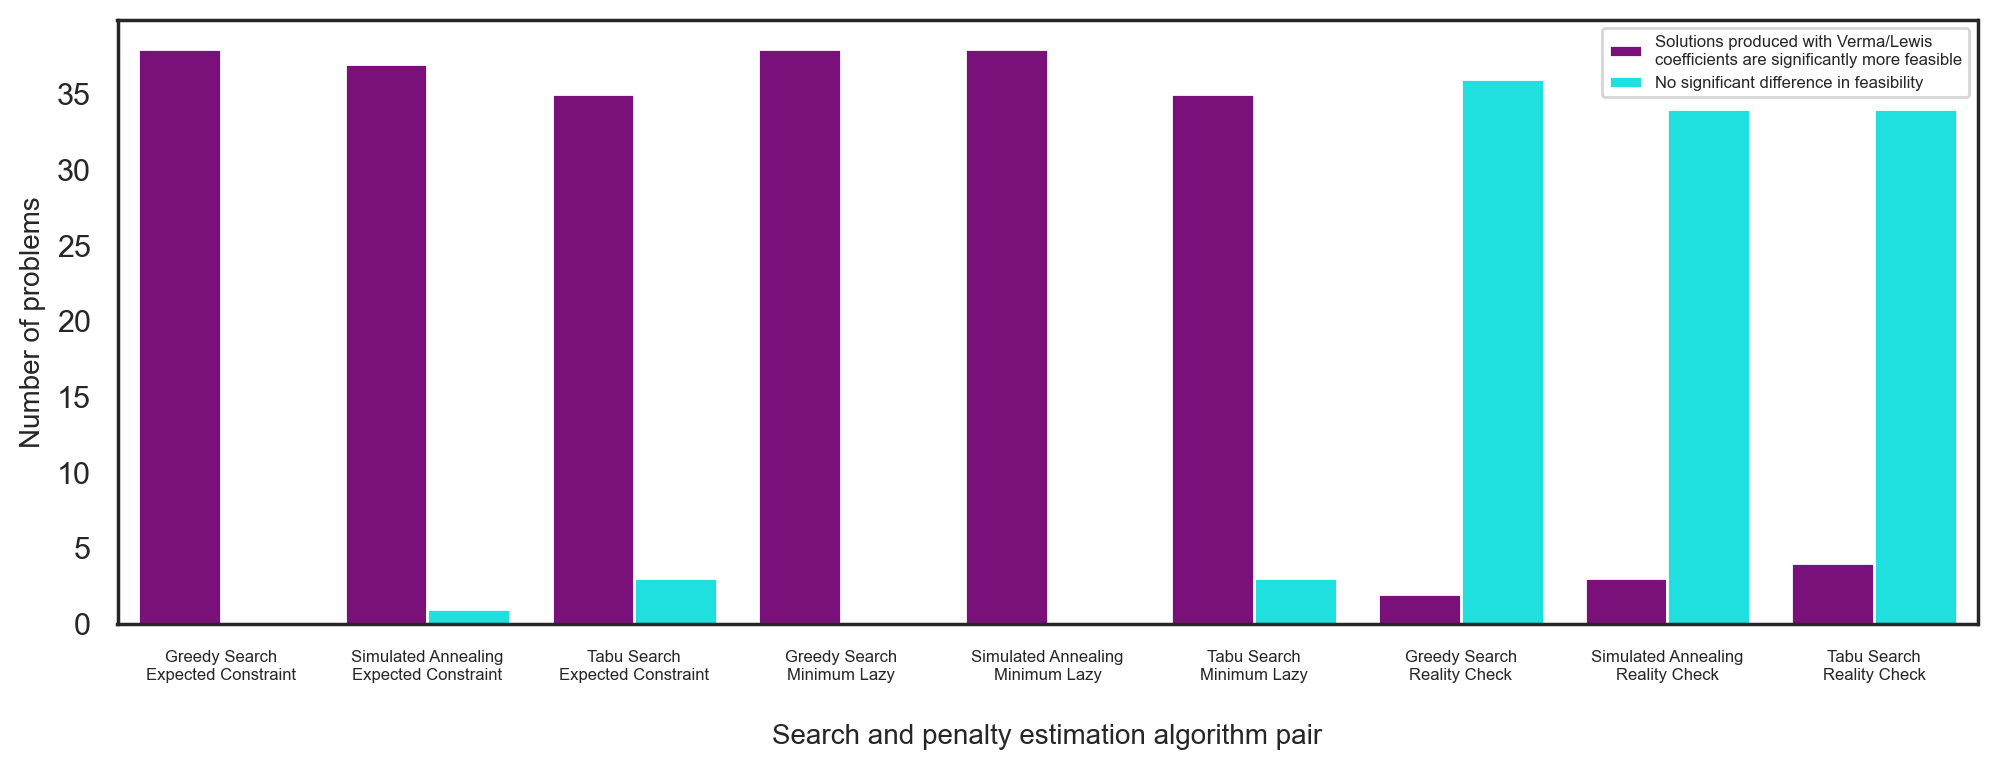

In [48]:
#set seaborn plotting aesthetics
plt.rc('text', usetex=False)
sns.set(style='white')
plt.figure(figsize=(12, 4), dpi=200)

#create grouped bar chart
sns.barplot(x='Algorithm Combo', y='Number', hue='Type', data=mk,
            palette=['darkmagenta', 'cyan'])

#add overall title
#plt.title('Feasibility comparison of Multiple Knapsack Problem solutions produced using Verma/Lewis and other M coefficients\n', fontsize=12)

legend = plt.legend(fontsize=6)
legend.get_texts()[0].set_text('Solutions produced with Verma/Lewis\ncoefficients are significantly more feasible')
legend.get_texts()[1].set_text('No significant difference in feasibility')

#add axis titles
plt.xlabel('\nSearch and penalty estimation algorithm pair', fontsize=10)
plt.ylabel('Number of problems', fontsize=10)


#rotate x-axis labels
plt.xticks(rotation=0, fontsize=6)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Greedy Search\nExpected Constraint'),
  Text(1, 0, 'Simulated Annealing\nExpected Constraint'),
  Text(2, 0, 'Tabu Search\nExpected Constraint'),
  Text(3, 0, 'Greedy Search\nMinimum Lazy'),
  Text(4, 0, 'Simulated Annealing\nMinimum Lazy'),
  Text(5, 0, 'Tabu Search\nMinimum Lazy'),
  Text(6, 0, 'Greedy Search\nReality Check'),
  Text(7, 0, 'Simulated Annealing\nReality Check'),
  Text(8, 0, 'Tabu Search\nReality Check')])

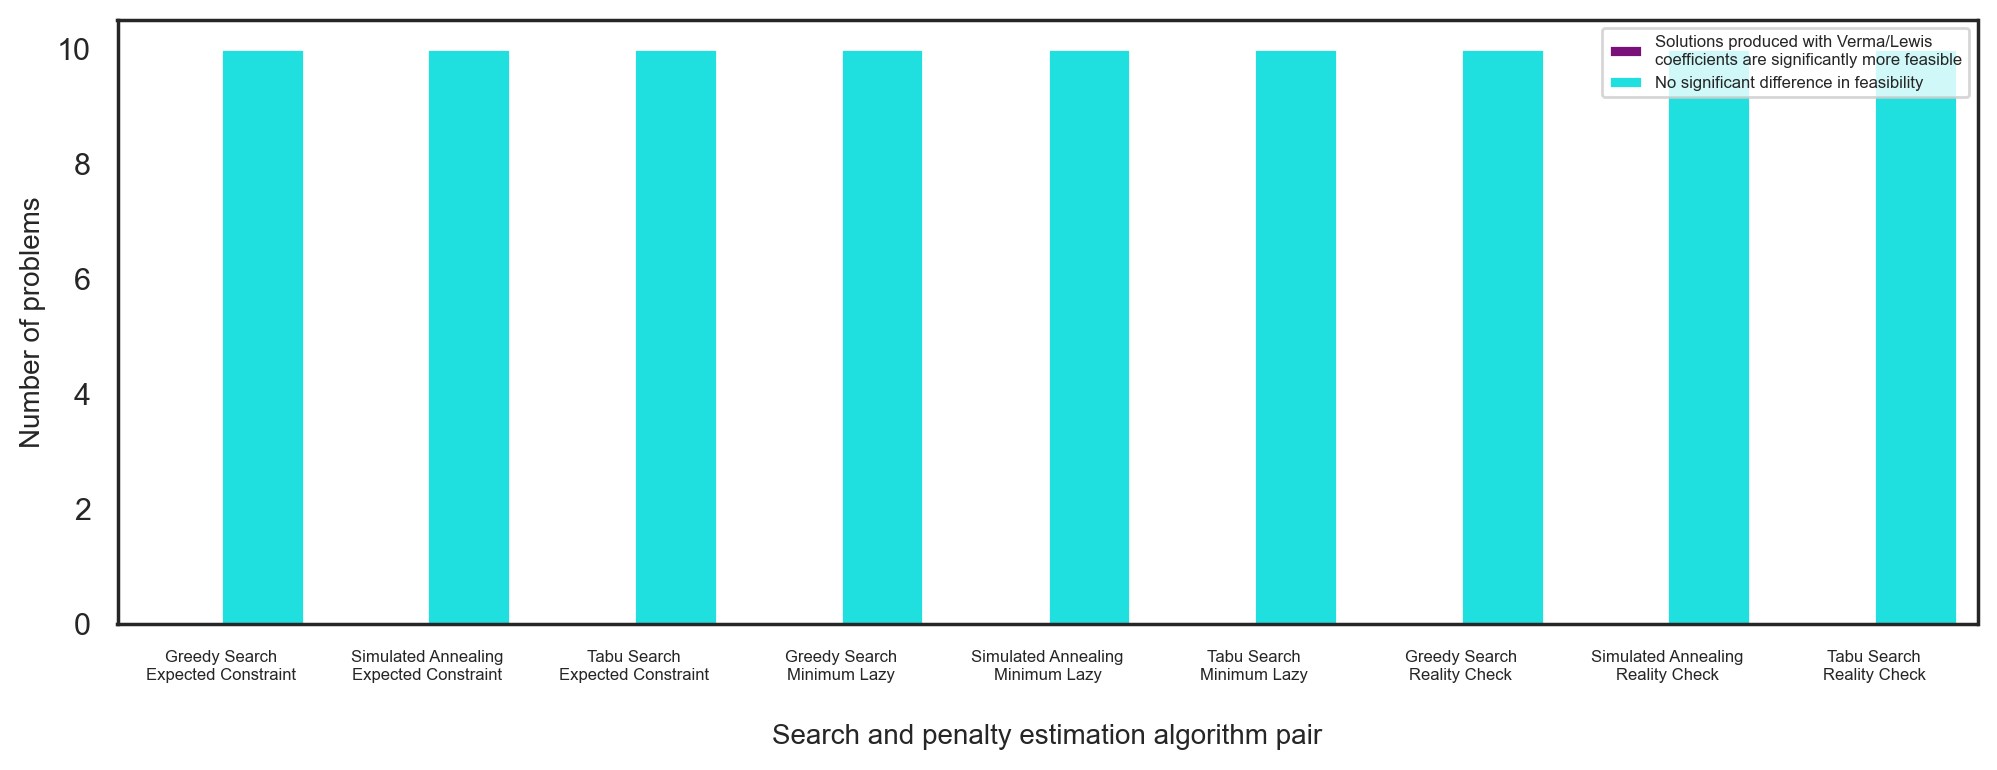

In [49]:
#set seaborn plotting aesthetics
plt.rc('text', usetex=False)
sns.set(style='white')
plt.figure(figsize=(12, 4), dpi=200)

#create grouped bar chart
sns.barplot(x='Algorithm Combo', y='Number', hue='Type', data=qa,
            palette=['darkmagenta', 'cyan'])

#add overall title
#plt.title('Feasibility comparison of Quadratic Assignment Problem solutions produced using Verma/Lewis and other M coefficients\n', fontsize=12)

legend = plt.legend(fontsize=6)
legend.get_texts()[0].set_text('Solutions produced with Verma/Lewis\ncoefficients are significantly more feasible')
legend.get_texts()[1].set_text('No significant difference in feasibility')

#add axis titles
plt.xlabel('\nSearch and penalty estimation algorithm pair', fontsize=10)
plt.ylabel('Number of problems', fontsize=10)


#rotate x-axis labels
plt.xticks(rotation=0, fontsize=6)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Greedy Search\nExpected Constraint'),
  Text(1, 0, 'Simulated Annealing\nExpected Constraint'),
  Text(2, 0, 'Tabu Search\nExpected Constraint'),
  Text(3, 0, 'Greedy Search\nMinimum Lazy'),
  Text(4, 0, 'Simulated Annealing\nMinimum Lazy'),
  Text(5, 0, 'Tabu Search\nMinimum Lazy'),
  Text(6, 0, 'Greedy Search\nReality Check'),
  Text(7, 0, 'Simulated Annealing\nReality Check'),
  Text(8, 0, 'Tabu Search\nReality Check')])

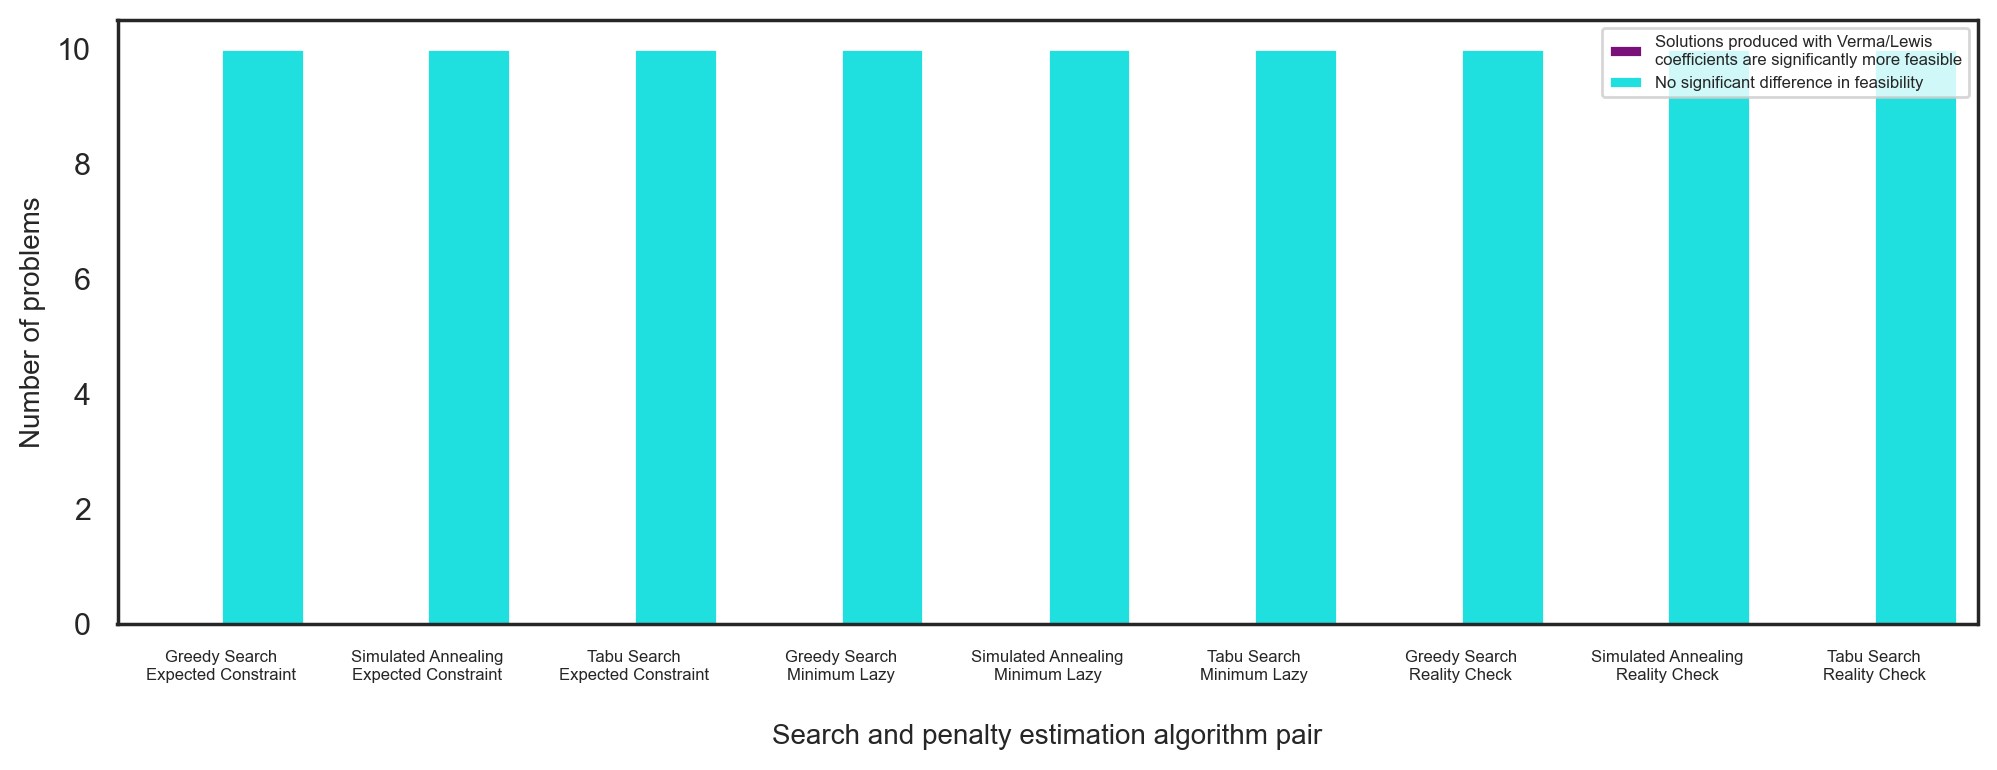

In [50]:
#set seaborn plotting aesthetics
plt.rc('text', usetex=False)
sns.set(style='white')
plt.figure(figsize=(12, 4), dpi=200)

#create grouped bar chart
sns.barplot(x='Algorithm Combo', y='Number', hue='Type', data=ts,
            palette=['darkmagenta', 'cyan'])

#add overall title
#plt.title('Feasibility comparison of Travelling Salesman Problem solutions produced using Verma/Lewis and other M coefficients\n', fontsize=12)

legend = plt.legend(fontsize=6)
legend.get_texts()[0].set_text('Solutions produced with Verma/Lewis\ncoefficients are significantly more feasible')
legend.get_texts()[1].set_text('No significant difference in feasibility')

#add axis titles
plt.xlabel('\nSearch and penalty estimation algorithm pair', fontsize=10)
plt.ylabel('Number of problems', fontsize=10)


#rotate x-axis labels
plt.xticks(rotation=0, fontsize=6)